<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Simple_Linear_Regression_Q1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


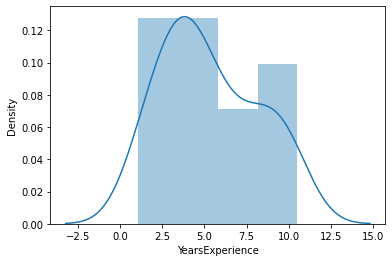

In [ ]:
import seaborn as sn
sn.distplot(data['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


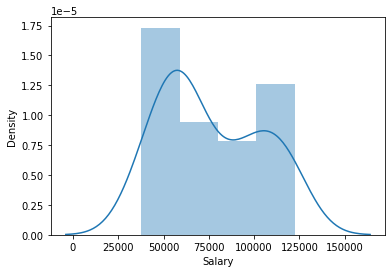

In [ ]:
sn.distplot(data['Salary'])

In [ ]:
#prediction for new model

In [ ]:
#fitting yearsexperience and salary together
import statsmodels.formula.api as smf
model=smf.ols('YearsExperience~Salary',data=data).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


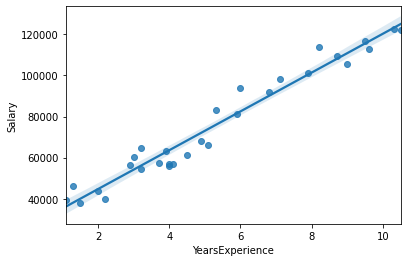

In [ ]:
sn.regplot(x="YearsExperience",y="Salary",data=data)

In [ ]:
#coefficients
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [ ]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [ ]:
#r squared values
print(model.rsquared,model.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.14e-20
Time:                        07:29:28   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9e91f1850>,
      dtype=object)

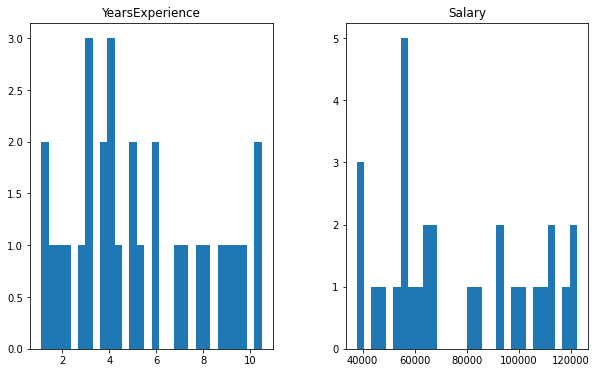

In [5]:
data.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [6]:
data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
YearsExperience,0.37956,-1.012212
Salary,0.35412,-1.295421


In [9]:
# Python Square root transformation
data.insert(len(data.columns), 'A_Sqrt',
         np.sqrt(data.iloc[:,0]))

In [10]:
data

,YearsExperience,Salary,A_Sqrt
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240
5,2.9,56642.0,1.702939
6,3.0,60150.0,1.732051
7,3.2,54445.0,1.788854
8,3.2,64445.0,1.788854
9,3.7,57189.0,1.923538


In [12]:
# Python log transform
data.insert(len(data.columns), 'C_log',
         np.log(data['Salary']))

In [13]:
data

,YearsExperience,Salary,A_Sqrt,C_log
0,1.1,39343.0,1.048809,10.580073
1,1.3,46205.0,1.140175,10.740843
2,1.5,37731.0,1.224745,10.538237
3,2.0,43525.0,1.414214,10.681091
4,2.2,39891.0,1.483240,10.593906
5,2.9,56642.0,1.702939,10.944506
6,3.0,60150.0,1.732051,11.004597
7,3.2,54445.0,1.788854,10.904946
8,3.2,64445.0,1.788854,11.073567
9,3.7,57189.0,1.923538,10.954117


In [14]:
from scipy.stats import boxcox

In [15]:
# Box-Cox Transformation in Python
data.insert(len(data.columns), 'A_Boxcox', 
              boxcox(data.iloc[:, 0])[0])

In [16]:
data

,YearsExperience,Salary,A_Sqrt,C_log,A_Boxcox
0,1.1,39343.0,1.048809,10.580073,0.097408
1,1.3,46205.0,1.140175,10.740843,0.278674
2,1.5,37731.0,1.224745,10.538237,0.445296
3,2.0,43525.0,1.414214,10.681091,0.814970
4,2.2,39891.0,1.483240,10.593906,0.948515
5,2.9,56642.0,1.702939,10.944506,1.369994
6,3.0,60150.0,1.732051,11.004597,1.425465
7,3.2,54445.0,1.788854,10.904946,1.533461
8,3.2,64445.0,1.788854,11.073567,1.533461
9,3.7,57189.0,1.923538,10.954117,1.788316


In [17]:
data.agg(['skew']).transpose()

,skew
YearsExperience,0.379560
Salary,0.354120
A_Sqrt,-0.049196
C_log,-0.044126
A_Boxcox,-0.093747
